<a href="https://colab.research.google.com/github/kazushitanno0912/Python100knock/blob/main/python100knock_%E7%89%A9%E6%B5%81%E3%82%B3%E3%82%B9%E3%83%88%E3%81%AE%E3%82%B3%E3%83%B3%E3%82%B5%E3%83%AB%E3%83%86%E3%82%A3%E3%83%B3%E3%82%B0%E3%82%92%E3%81%97%E3%81%A6%E3%81%BF%E3%82%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Pythonデータ分析100本ノック/100knock-data_analytics/6章')

## 物流の最適ルートをコンサルティングする

物流に関するデータを読み込む

In [4]:
import pandas as pd

# 工場データの読み込み
factories = pd.read_csv("tbl_factory.csv", index_col=0)
factories

# FCIDがキー

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北
FC00006,山形工場,30,東北
FC00007,那須工場,25,東北
FC00008,青森工場,16,東北


In [5]:
# 倉庫データの読み込み
warehouses = pd.read_csv("tbl_warehouse.csv", index_col=0)
warehouses

# WHIDがキー

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北
WH00006,山形倉庫,65,東北


In [6]:
# コストテーブル
cost = pd.read_csv("rel_cost.csv", index_col=0)
cost.head()

# FC00001工場へWH00001倉庫から部品を輸送した場合のコストは0.4という意味合い

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [7]:
# 輸送トランザクションテーブル
trans = pd.read_csv("tbl_transaction.csv", index_col=0)
trans.head()

# FC00004工場へWH00003からQuantity33が20190101に実施

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [8]:
# トランザクションテーブルとコストテーブルをジョイン
# FCID、WHIDをキーにジョイン
# 輸送実績を主体として結合していくため、left joinを実施
join_data = pd.merge(trans, cost, left_on=["ToFC","FromWH"], right_on=["FCID","WHID"], how="left")
join_data.head()

# CostはQuantityによらない？

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [9]:
# 工場情報を付与
# FCIDをキーにジョイン
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

# QuantityとFCDemandの関係が不明

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東


In [10]:
# 倉庫情報を付与
# WHIDをキーにジョイン
join_data = pd.merge(join_data, warehouses, left_on="FromWH", right_on="WHID", how="left")
# カラムの並び替え
join_data = join_data[["TransactionDate","Quantity","Cost","ToFC","FCName","FCDemand","FromWH","WHName","WHSupply","WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [11]:
# 関東データを抽出
# 関東データと東北データを比較
kanto = join_data.loc[join_data["WHRegion"]=="関東"]
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [12]:
# 東北データを抽出
tohoku = join_data.loc[join_data["WHRegion"]=="東北"]
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


現状の輸送量、コストを確認する

In [13]:
# 支社のコスト合計を算出
print("関東支社の総コスト: " + str(kanto["Cost"].sum()) + "万円")
print("東北支社の総コスト: " + str(tohoku["Cost"].sum()) + "万円")

# 関東支社の方が総コストが多い→関東の方が需要が多そうなので

関東支社の総コスト: 2189.3万円
東北支社の総コスト: 2062.0万円


In [14]:
# 支社の総輸送個数
print("関東支社の総部品輸送個数: " + str(kanto["Quantity"].sum()) + "個")
print("東北支社の総部品輸送個数: " + str(tohoku["Quantity"].sum()) + "個")

# 東北支社の方が総輸送個数が多い→関東よりも効率よく輸送している？

関東支社の総部品輸送個数: 49146個
東北支社の総部品輸送個数: 50214個


In [15]:
# 部品一つ当たりの輸送コスト
tmp = (kanto["Cost"].sum() / kanto["Quantity"].sum()) * 10000
print("関東支社の部品１つ当たりの輸送コスト: " + str(int(tmp)) + "円")
tmp = (tohoku["Cost"].sum() / tohoku["Quantity"].sum()) * 10000
print("東北支社の部品１つ当たりの輸送コスト: " + str(int(tmp)) + "円")

# 東北支社の方が輸送コストが少ない

関東支社の部品１つ当たりの輸送コスト: 445円
東北支社の部品１つ当たりの輸送コスト: 410円


In [16]:
# コストテーブルを支社ごとに集計
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
# 平均
print("東京支社の平均輸送コスト：" + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="関東"].mean()) + "万円")
print("東北支社の平均輸送コスト：" + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="東北"].mean()) + "万円")

東京支社の平均輸送コスト：1.075万円
東北支社の平均輸送コスト：1.05万円


ネットワークを可視化する

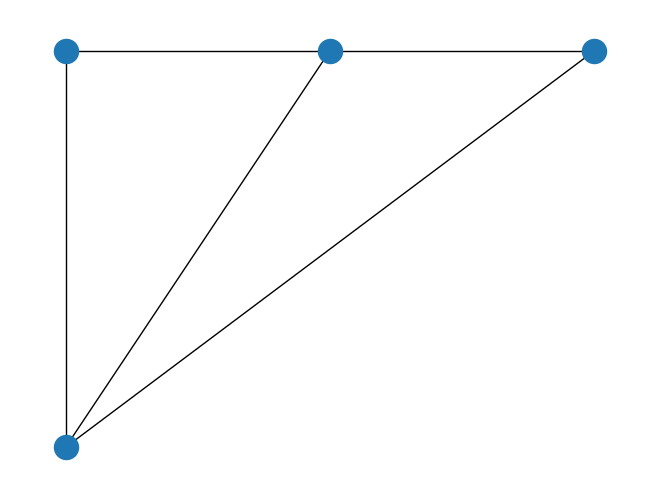

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフオブジェクトの作成
G=nx.Graph()

# 頂点の設定
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")
G.add_node("nodeD")

# 辺の設定
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")
G.add_edge("nodeA","nodeD")
G.add_edge("nodeB","nodeD")

# 座標の設定
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)
pos["nodeD"]=(2,1)

# 描画
nx.draw(G,pos)

# 表示
plt.show()

ネットワークにノードを追加してみる

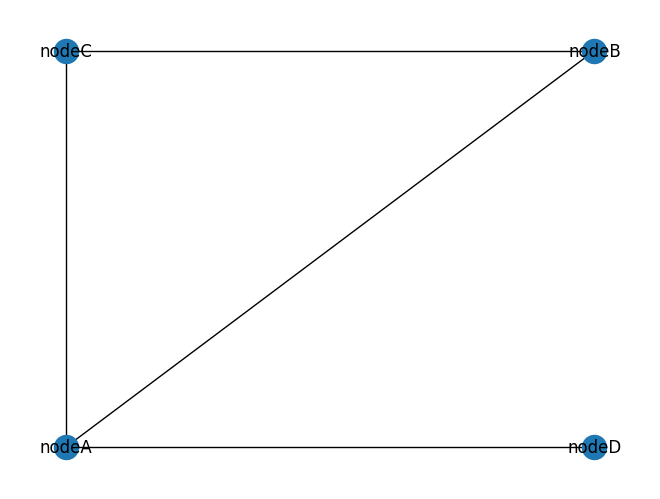

In [18]:
# グラフオブジェクトの作成．
G=nx.Graph()

# 頂点の設定
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")
G.add_node("nodeD")
# G.add_node("nodeE")

# 辺の設定
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")
G.add_edge("nodeA","nodeD")
# G.add_edge("nodeD","nodeE")

# 座標の設定
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)
pos["nodeD"]=(1,0)
# pos["nodeE"]=(1,2)

# 描画
nx.draw(G,pos, with_labels=True)

# 表示
plt.show()

ルートの重みづけをしてみる

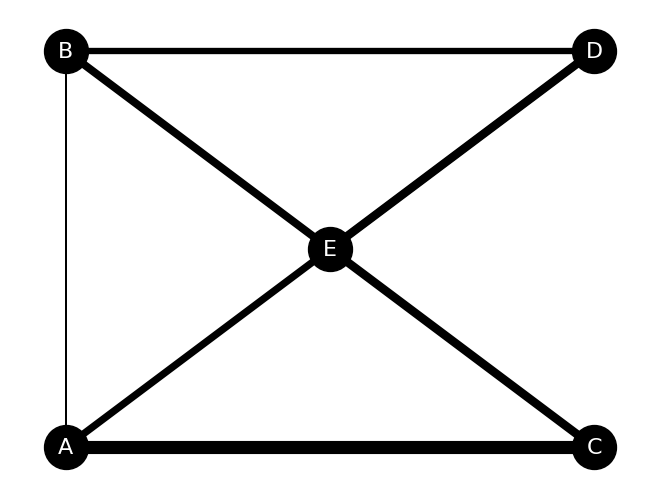

In [19]:
import numpy as np

# データ読み込み
df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])

# 辺の設定&エッジの重みのリスト化
size = 10
edge_weights = []
num_pre = 0
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        if not (i==j):
            # 辺の追加
            G.add_edge(df_w.columns[i],df_w.columns[j])
            if num_pre<len(G.edges):
              num_pre = len(G.edges)
              # エッジの重みの追加
              edge_weights.append(df_w.iloc[i][j]*size)

# 座標の設定
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0],df_p[node][1])

# 描画
nx.draw(G, pos, with_labels=True,font_size=16, node_size = 1000, node_color='k', font_color='w', width=edge_weights)

# 表示
plt.show()


# 重みを線の太さで再現することで、物流の最適ルートをわかりやすく可視化することができる

輸送ルート情報を読み込む

In [21]:
# データ読み込み
df_tr = pd.read_csv('trans_route.csv', index_col = "工場")
df_tr.head()


# W1（倉庫）→F1（工場）への輸送コストが15かかるという見方

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


輸送ルート情報からネットワークを可視化してみる

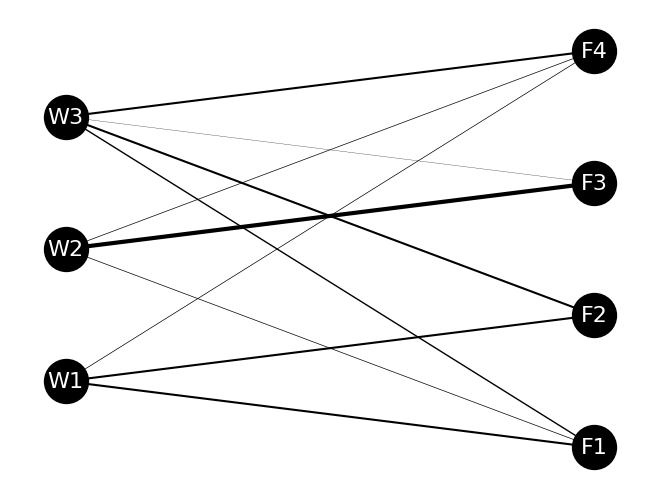

In [22]:
# データ読み込み
df_tr = pd.read_csv('trans_route.csv', index_col="工場")
df_pos = pd.read_csv('trans_route_pos.csv')


# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

# 辺の設定&エッジの重みのリスト化
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            # 辺の追加
            G.add_edge(df_pos.columns[i],df_pos.columns[j])
            # エッジの重みの追加
            if num_pre<len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (df_pos.columns[i] in df_tr.columns)and(df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                elif(df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                edge_weights.append(weight)


# 座標の設定
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0],df_pos[node][1])

# 描画
nx.draw(G, pos, with_labels=True,font_size=16, node_size = 1000, node_color='k', font_color='w', width=edge_weights)

# 表示
plt.show()


# 線の太さ→量
# 線のつなぎ→輸送ルート（位置情報を緯度・経度で算出している）

# どの倉庫からどの工場へもルートが存在する
# 輸送ルートは集約したほうが効率がいいはず

In [23]:
df_pos

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


輸送コスト関数を作成する

In [27]:
# 最適化問題：最小化（または最大化）したいものを関数として定義する（これを目的関数とよぶ）
# また、守るべき条件を定義→制約条件
# 制約条件を満たした上で目的関数を最小化（または最大化）する組み合わせを選択する、というのが最適化問題の大きな流れ


# データ読み込み
df_tr = pd.read_csv('trans_route.csv', index_col="工場")
df_tc = pd.read_csv('trans_cost.csv', index_col="工場")

# 輸送コスト関数
def trans_cost(df_tr,df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
    return cost

print("総輸送コスト:"+str(trans_cost(df_tr,df_tc)))


# 今回の輸送コストは輸送量とコストを掛け合わせ、それらをすべて足し合わせることで試算を出す
# 現在の総輸送コストは1493万円

総輸送コスト:1493


In [25]:
# W1（倉庫）→F1（工場）へのルートが15となる
df_tr

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [26]:
# W1（倉庫）→F1（工場）へのコストが10かかる
df_tc

,F1,F2,F3,F4
工場,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


制約条件を作る

In [28]:
# 各倉庫の供給可能な上限と、各工場の満たすべき最低限の製品製造量を制約条件の1つとする


# データ読み込み
df_tr = pd.read_csv('trans_route.csv', index_col="工場")
# 工場の需要
df_demand = pd.read_csv('demand.csv')
# 倉庫の供給
df_supply = pd.read_csv('supply.csv')

# 需要側の制約条件
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i])+"への輸送量:"+str(temp_sum)+" (需要量:"+str(df_demand.iloc[0][i])+")")
    if temp_sum>=df_demand.iloc[0][i]:
        print("需要量を満たしています。")
    else:
        print("需要量を満たしていません。輸送ルートを再計算して下さい。")

# 供給側の制約条件
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i])+"からの輸送量:"+str(temp_sum)+" (供給限界:"+str(df_supply.iloc[0][i])+")")
    if temp_sum<=df_supply.iloc[0][i]:
        print("供給限界の範囲内です。")
    else:
        print("供給限界を超過しています。輸送ルートを再計算して下さい。")

F1への輸送量:30 (需要量:28)
需要量を満たしています。
F2への輸送量:30 (需要量:29)
需要量を満たしています。
F3への輸送量:32 (需要量:31)
需要量を満たしています。
F4への輸送量:25 (需要量:25)
需要量を満たしています。
W1からの輸送量:35 (供給限界:35)
供給限界の範囲内です。
W2からの輸送量:40 (供給限界:41)
供給限界の範囲内です。
W3からの輸送量:42 (供給限界:42)
供給限界の範囲内です。


In [29]:
df_supply

,W1,W2,W3
0,35,41,42


輸送ルートを変更して、輸送コスト関数の変化を確認する

In [30]:
# データ読み込み
# trans_route_new.csvは新輸送ルート
df_tr_new = pd.read_csv('trans_route_new.csv', index_col="工場")
print(df_tr_new)

# 総輸送コスト再計算
print("総輸送コスト(変更後):"+str(trans_cost(df_tr_new,df_tc)))

# 制約条件計算関数
# 需要側
def condition_demand(df_tr,df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum>=df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

# 供給側
def condition_supply(df_tr,df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum<=df_supply.iloc[0][i]:
            flag[i] = 1
    return flag

print("需要条件計算結果:"+str(condition_demand(df_tr_new,df_demand)))
print("供給条件計算結果:"+str(condition_supply(df_tr_new,df_supply)))


# 新ルートでは、W1→F4への輸送を減らし、その分をW2→F4への輸送で補うというもの
# 輸送コストは1433万円→1428万円に削減した
# 供給条件が満たせていないので、この改善案ではだめ

    F1  F2  F3  F4
工場                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15
総輸送コスト(変更後):1428
需要条件計算結果:[1. 1. 1. 1.]
供給条件計算結果:[1. 0. 1.]
